# Quantum Fourier Transform

$$\newcommand\ket[1]{\left| #1 \right\rangle}$$
In these notes, we will study quantum Fourier transform (QFT) algorithm for computing the Fourier transform of a quantum superposition.

<div class="alert alert-block" style="background-color:lightcyan; border-color:black white black white">
    We will derive QFT differently from many online sources emphasizing how the divide-and-conquer of FFT can be converted from a classical divide-and-conquer into a "quantum" divide-and-conquer. H/T to the following note:
 <br> <br> Gloria Paradisi, and Hugues Randriam: <i> A presentation of the quantum Fourier transform from a recursive viewpoint </i>, arXiv:quant-ph/0411069, <a href="https://arxiv.org/abs/quant-ph/0411069">https://arxiv.org/abs/quant-ph/0411069</a>
</div>

Recall the (discrete-time) Fourier transform of a signal 

$$a_0, \ldots, a_{N-1}$$

is defined as a sequence of complex numbers $A_0, \ldots, A_{N-1}$ wherein we will define a polynomial $p(x) = \frac{1}{\sqrt{N}} \left( a_0 + a_1 x + \cdots + a_{N-1}x^{N-1} \right) $.
$$A_j = p(\omega_N^j) = \frac{1}{\sqrt{N}} \sum_{i=0}^{N-1} a_i \omega_N^{j \times i} \,,$$
wherein $\omega_N = \exp\left( \frac{2 \pi i}{N} \right)$ generates the $N^{th}$ root of unity.

<div class="alert alert-block" style="background-color:lightcyan; border-color:black white black white">
Note that in our previous course, when we studied FFT algorithm, we did not have the $\frac{1}{\sqrt{N}}$ factor in the definition of the Fourier transform. For the quantum version, we will have that so that the result of QFT can be normalized, as we will see.
</div>


As an example $N = 4$, $\omega_4 = \exp\left(\frac{\pi}{2} \right) = i$. Let us consider 
$$a_0 = 0, a_1 = \frac{1}{\sqrt{2}}, a_2 = \frac{1}{\sqrt{2}}, a_3 = 0$$
We have 
$$\begin{array}{lll}
A_0 & = \frac{1}{2} (a_0 + a_1 + a_2 + a_3) & = \frac{1}{\sqrt{2}} \\
A_1 & = \frac{1}{2} (a_0 + i a_1 + i^2 a_2 + i^3 a_3) &= \frac{1}{2} \left( \frac{i}{\sqrt{2}} - \frac{1}{\sqrt{2}} \right) \\ 
A_2 & = \frac{1}{2} (a_0 + i^2 a_1 + i^4 a_2 + i^6 a_3)& =0 \\ 
A_3 & = \frac{1}{2} (a_0 + i^3 a_1 + i^6 a_2 + i^9 a_3) & = \frac{1}{2} \left( -\frac{i}{\sqrt{2}} - \frac{1}{\sqrt{2}} \right)\\
\end{array}$$


<div class="alert alert-block" style="background-color:lightcyan; border-color:black white black white">
QFT performs FT on the amplitudes of a superposition. Therefore, in the example above,  applying QFT on 
    the superposition
    $$\ket{\psi} = \frac{1}{\sqrt{2}} \ket{1} + \frac{1}{\sqrt{2}} \ket{2} $$ 
    yields the super position
    $$\ket{\varphi} = \frac{1}{\sqrt{2}} \ket{0} + \frac{i-1}{2 \sqrt{2}} \ket{1} - \frac{i+1}{2 \sqrt{2}} \ket{3} $$
    
</div>

## QFT is a Unitary Operator

The very first observation is that we can implement Fourier transform on quantum superposition amplitudes because the QFT as defined above is the Unitary operator.

<div class="alert alert-block" style="background-color:lightcyan; border-color:black white black white">

Specifically the $m$-bit QFT operation is defined over super-positions (let $N=2^m$):
    $$ \ket{\psi} = \sum_{j=0}^{N-1} a_j \ket{j} $$ 
 where the amplitudes are $a_0, \ldots, a_{N-1}$ into the super position:
    $$\ket{\psi'} = \sum_{j=0}^{N-1} A_j \ket{j} $$
Here $A_0, \ldots, A_{N-1}$ represent the Fourier transform of the coefficients $a_0, \ldots, a_{N-1}$:
$$A_j = p(\omega_N^j) = \frac{1}{\sqrt{N}} \sum_{i=0}^{N-1} a_i \omega_N^{j \times i} \,,$$
wherein $\omega_N = \exp\left( \frac{2 \pi i}{N} \right)$ generates the $N^{th}$ root of unity.
    
</div>


We can write: 

$$\left( \begin{array}{c}
A_0 \\ 
A_1 \\
\vdots\\
A_{N-1}\\ 
\end{array}\right) = \underset{QFT_m}{\underbrace{\frac{1}{\sqrt{N}} \left[ \begin{matrix}
(\omega_N^0)^0 & (\omega_N^0)^1 & \cdots & (\omega_N^0)^{N-1} \\ 
(\omega_N^1)^0 & (\omega_N^1)^1 & \cdots & (\omega_N^1)^{N-1} \\ 
\vdots & & \ddots & \vdots \\ 
(\omega_N^{N-1})^0 & (\omega_N^{N-1})^1 & \cdots & (\omega_N^{N-1})^{N-1} \\ 
\end{matrix}\right]}} \left( \begin{array}{c}
a_0 \\ 
a_1 \\
\vdots\\
a_{N-1}\\ 
\end{array}\right)$$


$QFT_m$ is a unitary operator. To verify this, we can check that $QFT_m \times QFT_m^\dagger =  QFT_m^\dagger \times QFT_m = I$.

Let $X = QFT_m^{\dagger} \times QFT_m$. Note that $X_{i,j}$ the $(i,j)$ entry of $X$ is simply the dot product of the $i^{th}$ column of $QFT_m$ with the $j^{th}$ column of $QFT_m$.

$$ \left\langle \frac{1}{\sqrt{N}} ( \omega_N^{i\times 0}, \cdots, \omega_N^{i \times N-1}) \right|\left.
\frac{1}{\sqrt{N}} ( \omega_N^{j\times 0}, \cdots, \omega_N^{j \times N-1}) \right\rangle = \frac{1}{N}
\sum_{k=0}^{N-1} \overline{\omega_N}^{ik} \omega_N^{jk} $$

If $i = j$ the summation becomes:
$$X_{ii} =  \frac{1}{N}
\sum_{k=0}^{N-1} \overline{\omega_N}^{ik} \omega_N^{ik} = \frac{1}{N}\sum_{k=0}^{N-1} 1 = 1$$
If $i \not= j$ the summation becomes:
$$X_{ij} = \frac{1}{N}
\sum_{k=0}^{N-1} \overline{\omega_N}^{ik} \omega_N^{jk} = \frac{1}{N}
\sum_{k=0}^{N-1}  \omega_N^{(j-i)k}  = \frac{1}{N} \frac{ \omega_N^{N(i-j)} -1}{\omega_N^{i-j} -1} = 0  $$
Note that $\omega_N^{N(i-j)} = 1$ for $i \not= j$.

This verifies that $X = I$. A very similar derivation can be used to  verify that $QFT_m \times QFT_m^\dagger = I$.
<div class="alert alert-block" style="background-color:lightcyan; border-color:black white black white">
QFT can be implemented as a quantum circuit without ancillary qubits or measurements.
</div>

The trick is to implement QFT using simpler gates such as Hadamard and controlled phase gates rather than an arbitrary gate involving a $2^m \times 2^m$ unitary matrix. 


We will use the ideas from Fast Fourier Transform to implement the QFT circuit.

## Reminder: Fast Fourier Transform (FFT)

Let us recall how FFT works. 

Given $a_0, \ldots, a_{N-1}$ (where $N = 2^m$), FFT splits the sequence into two halves which are $N/2$ long.

$$\mathsf{EVEN}: a_0, a_2, \ldots, a_{N-2},\;\; \mathsf{ODD}: a_1, a_3, \ldots, a_{N-1}$$

**Divide** First we compute the FFT of the $\mathsf{EVEN}$ and $\mathsf{ODD}$ subsequences, __recursively__. Let  the FFT over $\mathsf{EVEN}$ be:
$$E_0, \ldots, E_{N/2-1}$$ 
We will denote the FFT over $\mathsf{ODD}$ as:
$$O_0, \ldots, O_{N/2-1}$$

**Combine** The combine step works to construct the FFT of the original sequence as:

$$ A_j = E_j + \omega_N^j O_j,\;\;\; A_{j+N/2} = E_j - \omega_N^j O_j $$


## Quantum Fourier Transform Circuit

At a high level, the $m$ qubit QFT circuit looks like this:

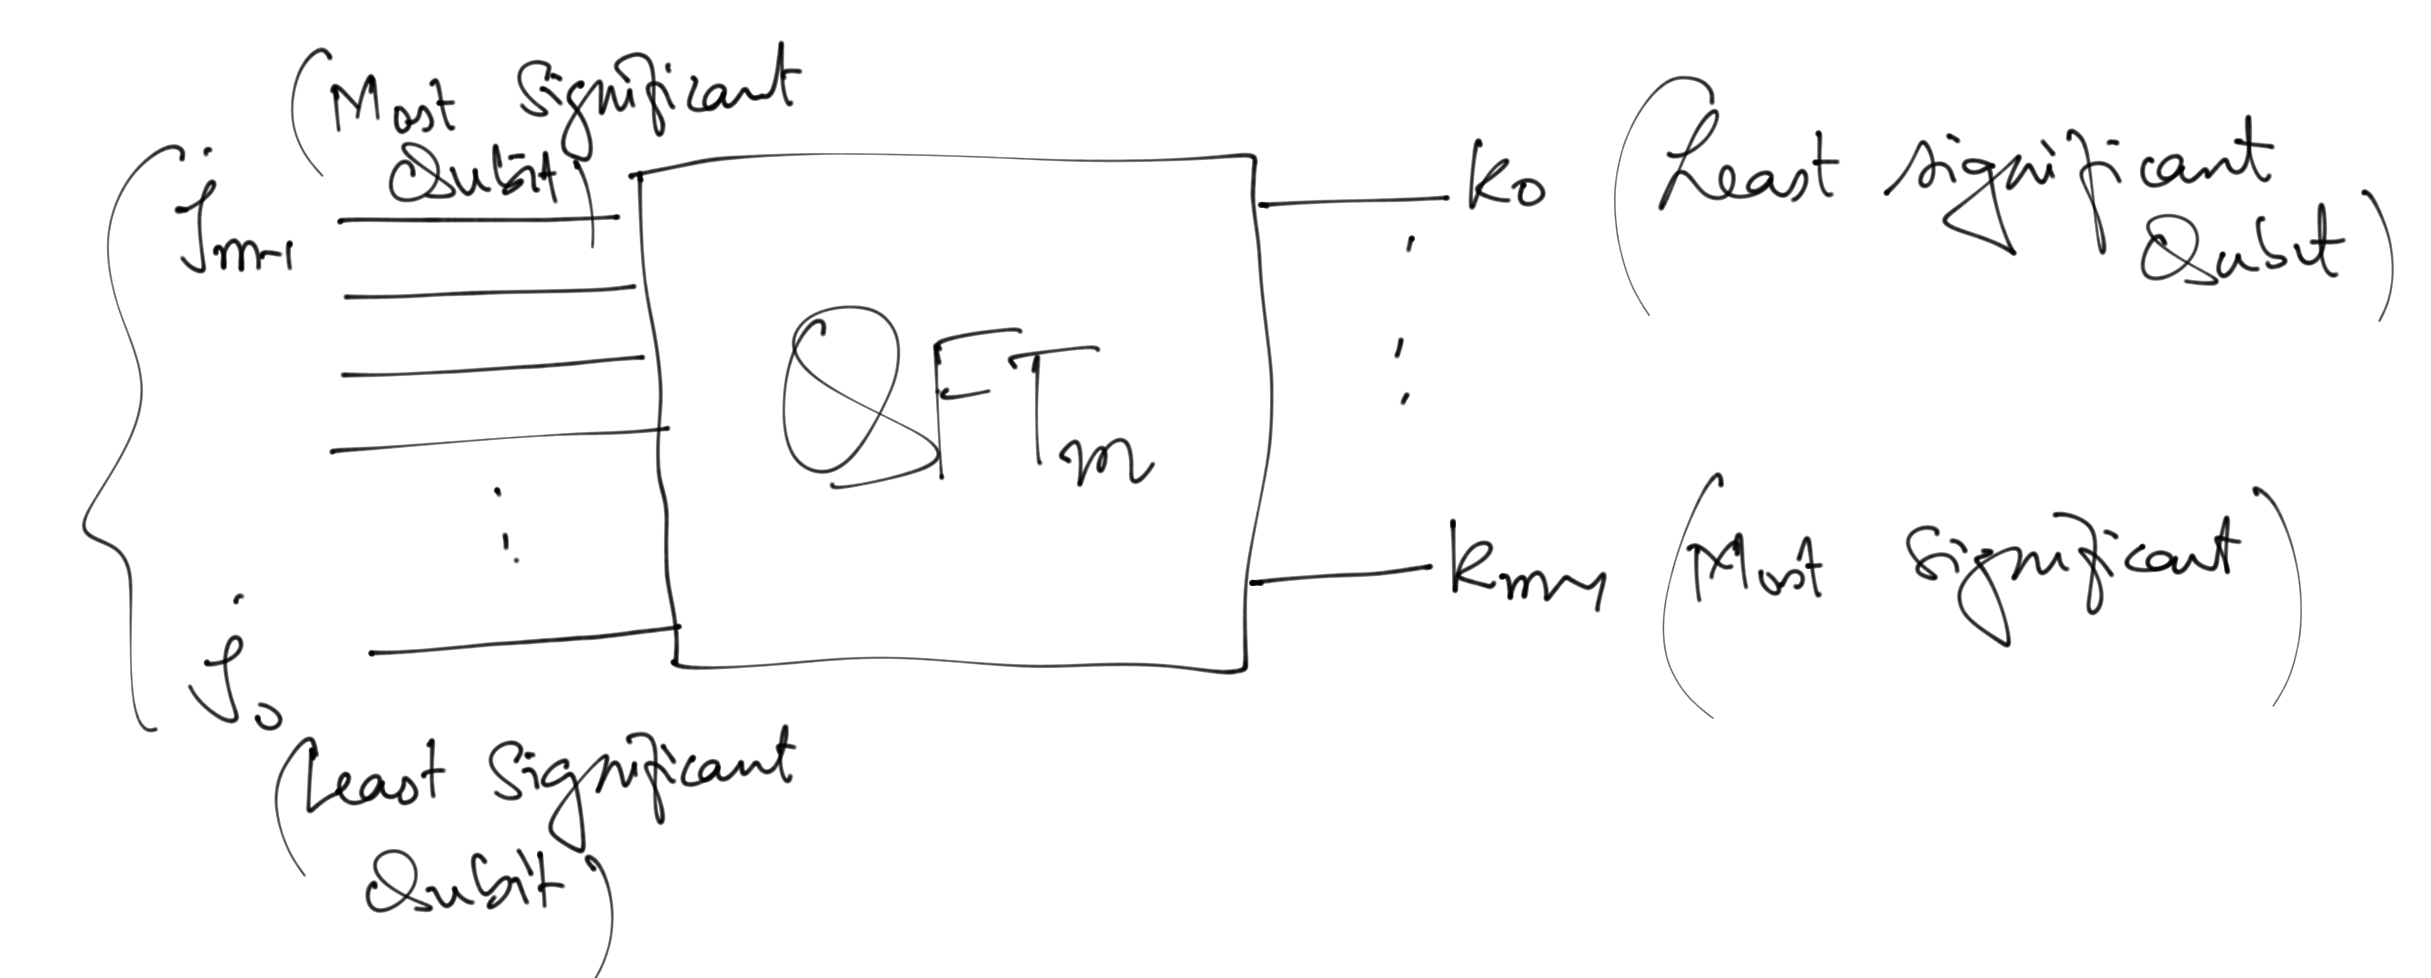</img>

The bit representation of a number $j$ will be written $[j_{m-1} \cdots j_0]$ where $j_0$ is the least significant bit and $j_{m-1}$ is the most significant bit.

For technical reasons that will be made clear, it is way more convenient to imagine the input of the circuit as the $m$ qubits $\ket{[j_{m-1}\cdots j_0]}$ while the output is $\ket{[k_{m-1} \cdots k_0]}$. It is convenient to write the output in reverse order from least significant on top to the most significant qubit on the bottom. 


For convenience, we will write $\ket{[j_{m-1}\cdots j_0]}$ also as $\ket{j}$ where $j = 2^{m-1} j_{m-1} + \cdots + 2^1 j_1 + 2^0 j_0$.

Just like FFT is recursive, we will implement the same divide and conquer scheme for QFT. In other words, we would like to achieve the following:
 - Separate $\ket{\psi} = \sum_{j=0}^{N-1} a_j \ket{j} $ into  $ \ket{\psi} = \sum_{j\ \mathsf{even}} a_j \ket{j} + \sum_{j\ \mathsf{odd}} a_j \ket{j} $ and apply fourier transform to the even and odd parts separately.
   - Note that in the bit representation $j$ being $\mathsf{even}$ is the same as $j_0 = 0$ and $j$ odd is simply $j_0 = 1$.
   $$\ket{\psi} = \underset{\text{EVEN} (j_0 = 0)}{\underbrace{\sum_{j_0 = 0} a_j \ket{[j_{m-1}\cdots j_1]} \otimes \ket{0} }}+ \underset{\text{ODD} (j_0 = 1)}{\underbrace{\sum_{j_0 = 1} a_j \ket{[j_{m-1}\cdots j_1]} \otimes \ket{1}}} \,. $$
   -  In other words, we "peel off" the $j_0$ qubit and the remaining bits $\ket{[j_{m-1},\ldots, j_1]}$ can be seen as a "superposition" of the even and odd parts.
   
Here comes the main part: recursion is simply achieved by running QFT with $m-1$ bits on the initial $m-1$ qubits as shown in the figure below:

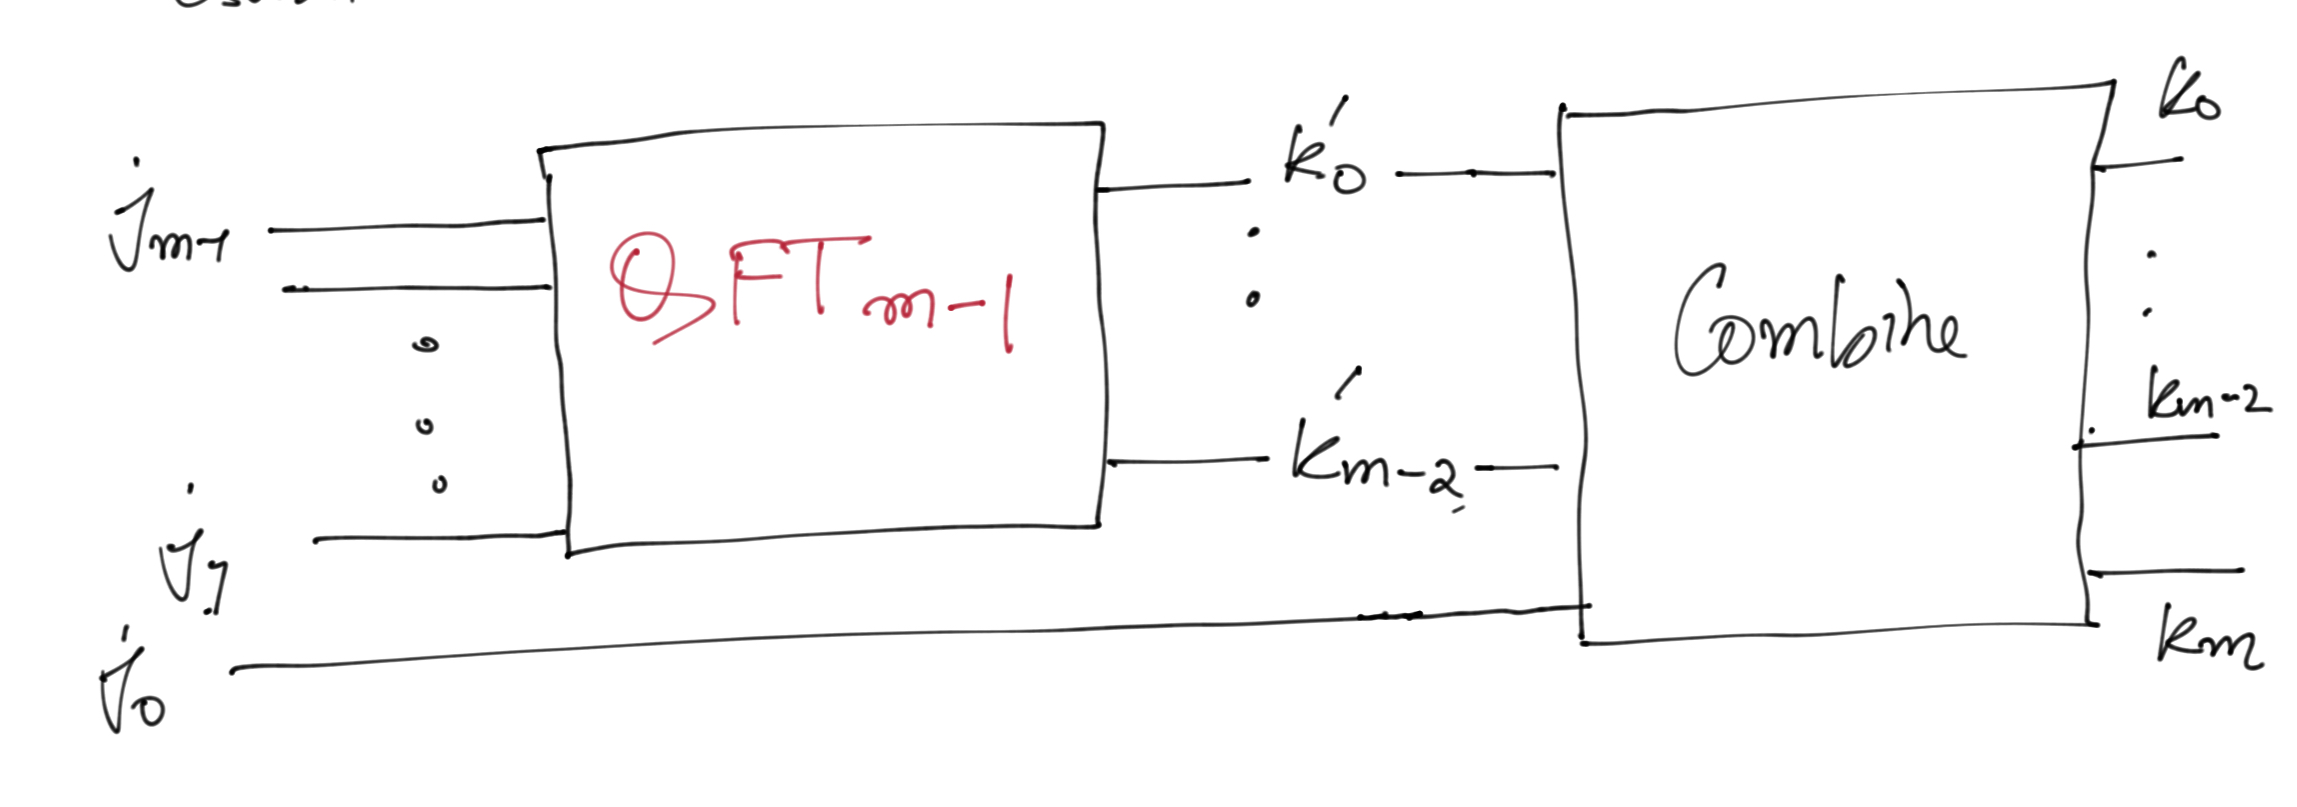 </img>

Here, we run QFT of $m-1$ bits or on $N/2$ length signal. Due to quantum parallelism, the $m-1$ QFT operation runs recursively on the even and odd parts of the super position at the same time yielding a super position that consists of the FFT of the even parts and the FFT of the odd parts.

The super position after running $QFT_{m-1}$ over the higher $m-1$ bits of the inputs is then 

$$ \ket{[k'_{0} \ldots k'_{m-2}]}\otimes \ket{j_0} = \underset{\text{QFT EVEN} (j_0 = 0)}{\underbrace{\sum_{k'=0}^{N/2-1} E_{k'} \ket{k'} \otimes \ket{0}}} + \underset{\text{QFT ODD} (j_0= 1)}{\underbrace{\sum_{k'=0}^{N/2-1} O_{k'} \ket{k'} \otimes \ket{1}}} $$

The next step is to implement the combine circuit. 

Combine needs to calculate 

$$A_k = \begin{cases}
E_{k} + \omega_N^{k} O_k & \text{if}\ k < \frac{N}{2}\\ 
E_{k-N/2} - \omega_N^{k-N/2} O_{k-N/2} & \text{if}\ k \geq \frac{N}{2} \\ 
\end{cases} $$ 

Note that $k= [k_{m-1} \cdots k_0] $ in its bit representation. Therefore, $k < \frac{N}{2}$ can be seen as
$k_{m-1} = 0$ and $k \geq \frac{N}{2}$ can be seen equivalently as $k_{m-1} = 1$. Also, when $k \geq N/2$, 
$k - \frac{N}{2}$ is simply the bit representation $[k_{m-2} \cdots k_0]$. Using these, we can rewrite
the combine step as 
$$ A_{[k_{m-1} \cdots k_0]} = \begin{cases}
E_{[k_{m-2} \cdots k_{0}]} + \omega_N^{[k_{m-2} \cdots k_0]} O_{[k_{m-2}\cdots k_0]} & \color{red}{\ \text{if}\ k_{m-1} = 0}\\ 
 E_{[k_{m-2} \cdots k_{0}]}  - \omega_N^{ [k_{m-2} \cdots k_0] } O_{[k_{m-2}\cdots k_0]} & \color{red}{\ \text{if}\ k_{m-1} = 1}\\ 
\end{cases} $$ 

The combine step can be implemented as follows: 
  - Pass the qubits $k'_0, \ldots, k'_{m-2}$ the outputs of $QFT_{m-1}$ unchanged as $k_0, \ldots, k_{m-2}$ respectively.
  - Transform the qubit $j_0$ into $k_{m-1}$ using the following operation that is controlled by $\ket{k'} = \ket{k_{m-2} \cdots k_0}$:
  
  $$\begin{array}{clc}
  E_{k'} \ket{k'} \otimes \overset{j_0}{\ket{0}}  & + &   O_{k'} \ket{k'} \otimes \overset{j_0}{\ket{1}} \\
& \downarrow\ \mathsf{Combine} & \\ 
(E_{k'} + \omega_N^{k'} O_k') \ \underset{k_{m-1}}{\ket{0}} \otimes \ket{k'}  &+& (E_{k'} - \omega_N^{k'} O_k') \ \underset{k_{m-1}}{\ket{1}} \otimes \ket{k'}\\  
\end{array}$$

In other words, we would like to implement the transformation (we will not worry too much about the normalization constants for now):

$$\begin{array}{rcl}
\ket{k'} \otimes \ket{0} & \rightarrow&  \frac{1}{\sqrt{2}} (\ket{0} + \ket{1}) \otimes \ket{k'}  \\ 
\ket{k'} \otimes \ket{1} & \rightarrow & \omega_N^{k'} \ket{0} \ket{k'} - \omega_N^{k'} \ket{1}{\ket{k'}} \\
\end{array}$$

Since $\ket{k'}$ remains unchanged, the matrix for this operation is given by 

$$\frac{1}{\sqrt{2}} \left[ \begin{matrix}
1 & \omega_N^{k'} \\ 
 1 & - \omega_N^{k'}
\end{matrix} \right] =  \frac{1}{\sqrt{2}} \left[\begin{matrix} 1 & 1 \\ 1 & -1 \\ \end{matrix} \right] \times \left[ \begin{matrix}
1 & 0 \\ 
 0 &  \omega_N^{k'}
\end{matrix} \right] 
$$
  
  
Note that the matrix $$\omega_N^{k'} = \exp\left( \frac{2 \pi i k'}{N} \right) = \exp\left( \frac{2 \pi i (2^{m-2}k_{m-2} + \cdots + 2^0 k_0)}{2^m} \right) = \exp\left( \frac{2\pi i k_{m-2}}{4} \right) \times 
\exp\left( \frac{2\pi i k_{m-3}}{8} \right) \cdots \times \exp\left( \frac{2\pi i k_{0}}{2^m} \right)$$

Let $P_j$ represent the controlled phase gate that adds a phase of  $\phi_j = \frac{2\pi}{2^{j}}$ controlled by the qubit $k_{m-j}$.

$$ P_j = \left[ \begin{matrix}
1 & 0 \\ 
0 & \exp\left( \frac{2\pi i k_{m-j}}{2^j} \right) \\
\end{matrix}\right]$$

the matrix for this operation (without normalization constants) is given by 

$$\frac{1}{\sqrt{2}} \left[ \begin{matrix}
1 & \omega_N^{k'} \\ 
 1 & - \omega_N^{k'}
\end{matrix} \right] =   \frac{1}{\sqrt{2}} \left[\begin{matrix} 1 & 1 \\ 1 & -1 \\ \end{matrix} \right] \times \left[ \begin{matrix}
1 & 0 \\ 
 0 &  \omega_N^{k'}
\end{matrix} \right] 
= H \times P_2 \times P_3 \times \cdots \times P_{m}  \,,$$
wherein $P_j$ are the controlled phase gates and $H$ is the Hadamard gate.

## Base-Case

The base case is simple: when we reach $QFT_1$ we have no more division to do since it has just one qubit as input. Verify that the matrix for $QFT_1$ is 
$$\frac{1}{\sqrt{2}} \left[ \begin{matrix} 
1  & 1 \\ 
1  & -1 \\ 
\end{matrix} \right]\,,$$
which is nothing but the Hadamard gate!


## Reversing the Final Outputs

Note that the QFT circuit as designed reverses the order of the outputs. Thus, if it is applied on a quantum register that holds values $b[m-1], \cdots, b[0]$, the outputs will have to be read as $b[0], \cdots, b[m-1]$ with $b[0]$ now as the most significant and $b[m-1]$ as the least significant. This can usually be taken care of classically or just noting that $b$ is now "reversed".

However, preserve the "endianness" of the register, we can swap the final output of the QFT using the quantum swap operation.

The swap gate is a special two qubit gate that implements the unitary transformation:
$$\left[ \begin{matrix}
1 & 0 & 0 & 0 \\ 
0 & 0 & 1 & 0 \\ 
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
\end{matrix}\right]$$
In other words, it leaves the pure states $\ket{00}$ and $\ket{11}$ unchanged while altering $\ket{01}$ into $\ket{10}$ and vice-versa.

In [51]:
from qiskit import QuantumCircuit, QuantumRegister, execute, Aer
from numpy import pi
def implement_qft(qc, b): 
    # b is the input quantum register 
    # b[0] is the least significant bit while b[m-1] is the most significant
    m = len(b)
    if m == 1:
        qc.h(b[0]) # base case
        qc.barrier(b, label=f"QFT_{m}")
    else:
        implement_qft(qc, b[1:m]) # implement QFT on the n-1 most significant bits
        # now implement the combine circuit
        # note that the least significant qubit at the output k_0 is b[m-1] now 
        #                      since things flip at the output of the QFT
        # k_1 = b[m-2]
        # ..
        # k_{m-2} = b[1]
        # k_{m-1} = b[0]
       
        for j in range(2,m+1):
            # implement a controlled phase gate 
            # angle = 2*pi/(2^{j}) 
            # control input is k_{m-j}
            i = (m-1) - (m-j)
            qc.cp(2*pi/(2**j), b[i], b[0])
        qc.h(b[0])
        qc.barrier(b, label=f"QFT_{m}")

def reverse_outputs(qc, b):
    # note that the QFT circuit naturally swaps the "endianness of the output"
    # In other words, b[0] is the MSB and b[m-1] is the least significant bit
    # this causes confusion when interpreting the output.
    # We will add swaps to correct this
    m = len(b)
    i = 0
    while i < (m-1)-i:
        qc.swap(b[i], b[m-1-i])
        i = i + 1
    qc.barrier(label="SWAP")

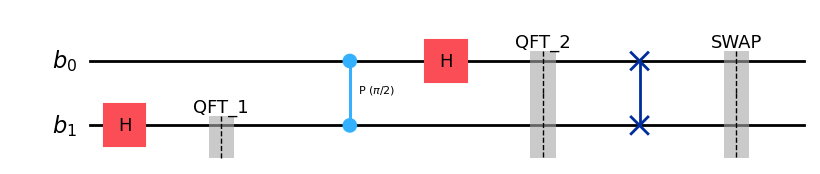

In [52]:
b = QuantumRegister(2, 'b')
qc = QuantumCircuit(b)
implement_qft(qc, b)
reverse_outputs(qc,b)
qc.draw('mpl', style='iqp')

In [49]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend, shots=16000)
result = job.result()
print(result.get_unitary(qc,3))

Operator([[ 0.5+0.j ,  0.5-0.j ,  0.5-0.j ,  0.5-0.j ],
          [ 0.5+0.j ,  0. +0.5j, -0.5+0.j , -0. -0.5j],
          [ 0.5+0.j , -0.5+0.j ,  0.5-0.j , -0.5+0.j ],
          [ 0.5+0.j , -0. -0.5j, -0.5+0.j ,  0. +0.5j]],
         input_dims=(2, 2), output_dims=(2, 2))


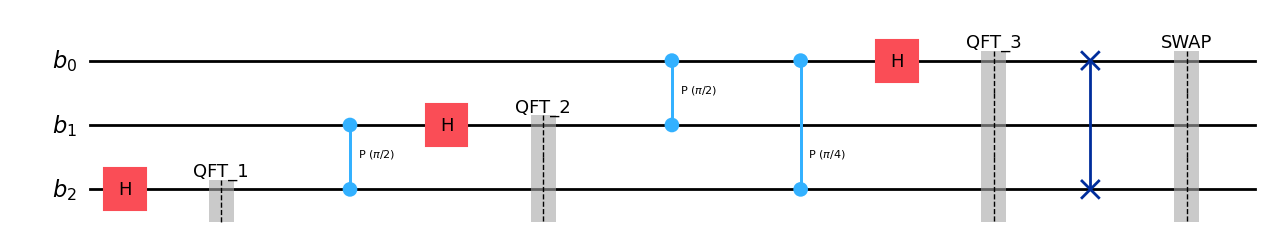

Operator([[ 0.3536+0.j    ,  0.3536-0.j    ,  0.3536-0.j    ,
            0.3536-0.j    ,  0.3536-0.j    ,  0.3536-0.j    ,
            0.3536-0.j    ,  0.3536-0.j    ],
          [ 0.3536+0.j    ,  0.25  +0.25j  ,  0.    +0.3536j,
           -0.25  +0.25j  , -0.3536+0.j    , -0.25  -0.25j  ,
           -0.    -0.3536j,  0.25  -0.25j  ],
          [ 0.3536+0.j    ,  0.    +0.3536j, -0.3536+0.j    ,
           -0.    -0.3536j,  0.3536-0.j    ,  0.    +0.3536j,
           -0.3536+0.j    , -0.    -0.3536j],
          [ 0.3536+0.j    , -0.25  +0.25j  , -0.    -0.3536j,
            0.25  +0.25j  , -0.3536+0.j    ,  0.25  -0.25j  ,
            0.    +0.3536j, -0.25  -0.25j  ],
          [ 0.3536+0.j    , -0.3536+0.j    ,  0.3536-0.j    ,
           -0.3536+0.j    ,  0.3536-0.j    , -0.3536+0.j    ,
            0.3536-0.j    , -0.3536+0.j    ],
          [ 0.3536+0.j    , -0.25  -0.25j  ,  0.    +0.3536j,
            0.25  -0.25j  , -0.3536+0.j    ,  0.25  +0.25j  ,
           -0.    -0.3536j

In [54]:
b = QuantumRegister(3, 'b')
qc = QuantumCircuit(b)
implement_qft(qc, b)
reverse_outputs(qc,b)
display(qc.draw('mpl', style='iqp'))
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend, shots=16000)
result = job.result()
print(result.get_unitary(qc,4))

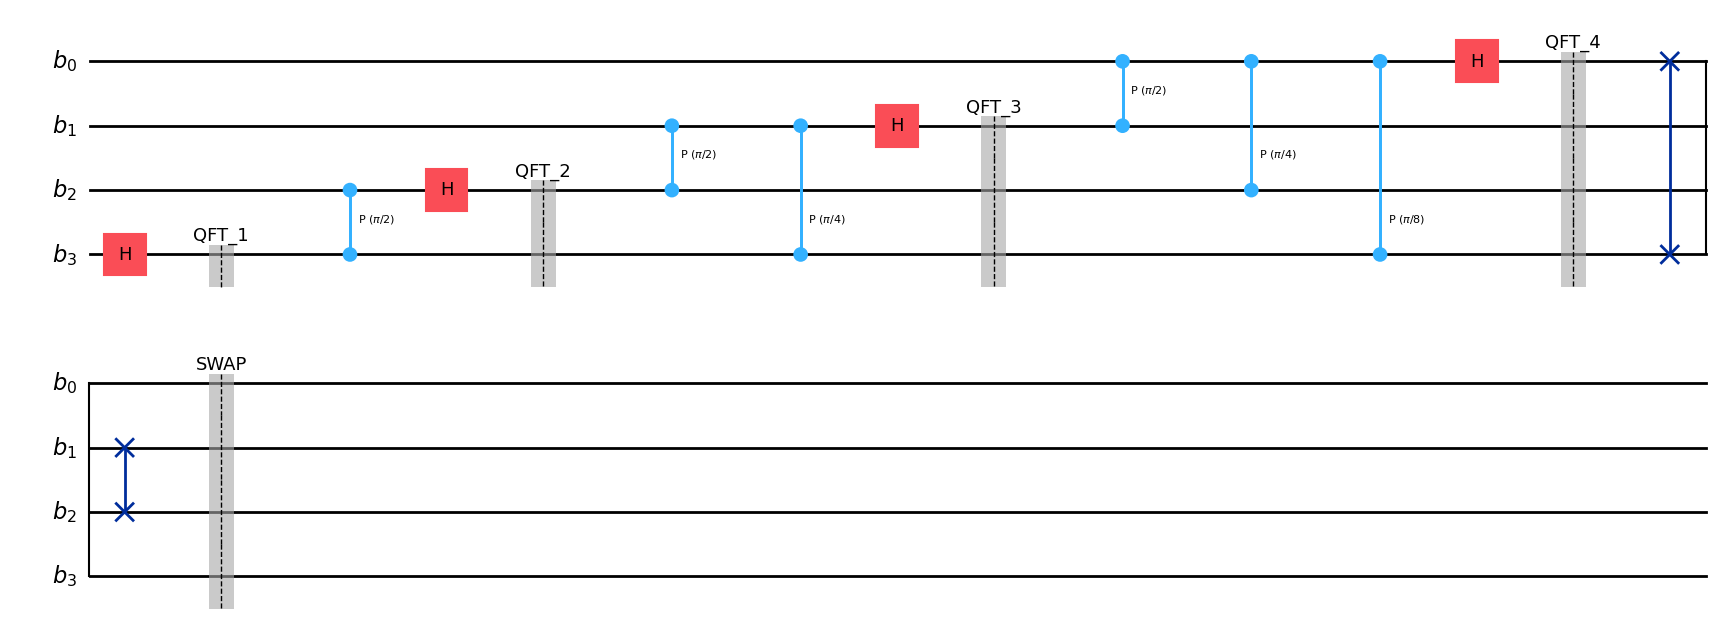

Operator([[ 0.25  +0.j    ,  0.25  -0.j    ,  0.25  -0.j    ,
            0.25  -0.j    ,  0.25  -0.j    ,  0.25  -0.j    ,
            0.25  -0.j    ,  0.25  -0.j    ,  0.25  -0.j    ,
            0.25  -0.j    ,  0.25  -0.j    ,  0.25  -0.j    ,
            0.25  -0.j    ,  0.25  -0.j    ,  0.25  -0.j    ,
            0.25  -0.j    ],
          [ 0.25  +0.j    ,  0.231 +0.0957j,  0.1768+0.1768j,
            0.0957+0.231j ,  0.    +0.25j  , -0.0957+0.231j ,
           -0.1768+0.1768j, -0.231 +0.0957j, -0.25  +0.j    ,
           -0.231 -0.0957j, -0.1768-0.1768j, -0.0957-0.231j ,
           -0.    -0.25j  ,  0.0957-0.231j ,  0.1768-0.1768j,
            0.231 -0.0957j],
          [ 0.25  +0.j    ,  0.1768+0.1768j,  0.    +0.25j  ,
           -0.1768+0.1768j, -0.25  +0.j    , -0.1768-0.1768j,
           -0.    -0.25j  ,  0.1768-0.1768j,  0.25  -0.j    ,
            0.1768+0.1768j,  0.    +0.25j  , -0.1768+0.1768j,
           -0.25  +0.j    , -0.1768-0.1768j, -0.    -0.25j  ,
            

In [55]:
b = QuantumRegister(4, 'b')
qc = QuantumCircuit(b)
implement_qft(qc, b)
reverse_outputs(qc,b)
display(qc.draw('mpl', style='iqp'))
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend, shots=16000)
result = job.result()
print(result.get_unitary(qc,4))